## Square Wave FFT

The periodic square wave function is defined as



$
f\left(t\right) =\begin{cases}
 -1,   &    -T/2≤t<0\\
+1,    &   0≤t<T/2
\end{cases}  
$

$f\left(t\pm nT\right)=f\left(t\right),\:n\:=\:1,\:2,\:3,\:4,\:...$

Note that, in the cycle centered on t=0, the square wave is just the sign of t. There's a python function for this (numpy sign)! For convienence, we will construct the square wave on the interval $[-T/2, +T/2]$ and assume periodicity $f(t \pm nT) = f(t)$

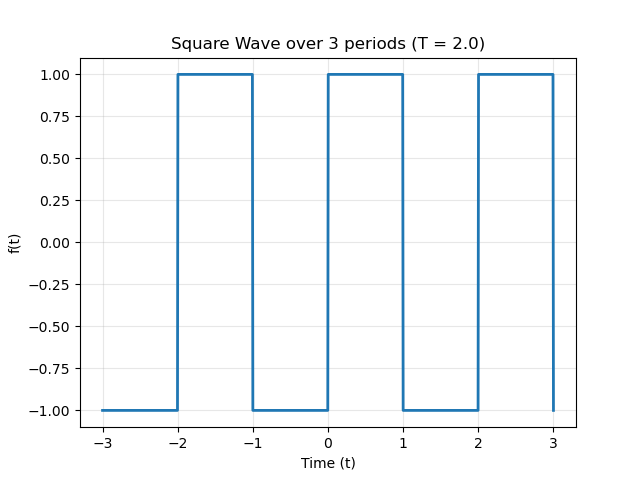


In [ ]:
from numpy import ones, arange, zeros, real, imag, sign
from scipy.fft import fft, fftshift

Fill in the blanks below to define a square wave on -T/2 to +T/2

In [ ]:
# Create the Square Wave

# fill in time dimensions
T = 
nt = 
dt = 
nfmax = # Fill in the maximum frequency, which is the Nyquist frequency.

# use arange to fill in time array t
# We can do this from -T/2 to +T/2

# If you do it from -T/2 to +T/2, then you will need to use fftshift before taking the FFT, 
# because fft assumes 0<t<T, but we defined -T/2 <= t < +T/2.

t= # Time array, size nt, from -T/2 to +T/2.

print(t[0],t[-1],dt)

# Create the square function in array f, matching the time array

# Fill in the square wave function. 
f =   # note that t is an array already and f is same size.


 Now take FFT. You can use this as is.

In [ ]:
# Take the FFT of the square wave, and get the Fourier coefficients 
# note use of fftshift because we defined t from -T/2 to +T/2, but fft assumes 0<t<T.
F = fft(fftshift(f), nt)

# get the cos and sin coeffs
a = 2*real(F[:nfmax])/nt # form the a coefficients
a[0] = a[0]/2
b = -2*imag(F[:nfmax])/nt # form the b coefficients


## Fourier Coefficients as Integrals

For a real-valued periodic function $f(t)$ with period $T$, the Fourier coefficients are defined as:

$$a_0 = \frac{2}{T}\int_0^T f(t)\,dt$$

$$a_n = \frac{2}{T}\int_0^T f(t)\cos\left(\frac{2\pi n t}{T}\right)dt, \quad n=1,2,3,...$$

$$b_n = \frac{2}{T}\int_0^T f(t)\sin\left(\frac{2\pi n t}{T}\right)dt, \quad n=1,2,3,...$$
Use these formulas to compute the integrals by hand to get analytic expressions for $a_n$ and $b_n$ and fill in below.


In [ ]:
# Get the analytic coefficients

# initialize to zeros
aan = zeros(nfmax)
ban = zeros(nfmax)

# 3 Fill in the math for the coefficients
for n in range(1,nfmax):
    ban[n]=
    aan[n]=


The Fourier series reconstruction is:

$$f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\infty}\left[a_n\cos\left(\frac{2\pi n t}{T}\right) + b_n\sin\left(\frac{2\pi n t}{T}\right)\right]$$



In [ ]:
# Reconstruct the square wave by suming fourier series for 1-10 terms

# Sum the Fourier Series
Nrecon = # Enter the number of Fourier terms to reconstruct with, e.g. 10.

# 4 Use a for loop to do the Fourier Sum above, for n=1...Nrecon
fr = ones(nt)*a[0] # fill time series with constant term

for n in range(1,Nrecon):
    fr = fr + 
    


Plot your results. You can use this as is.

In [ ]:
# Plot the function, the reconstruction, and the error
from matplotlib.pyplot import plot,xlabel,ylabel,legend,show, figure, subplot, title, tight_layout, stem

subplot(2,2,1)
plot(t,f)
plot(t,fr)
title('Function')
xlabel('time')
ylabel('f(t)')

subplot(2,2,2)
plot(t, fr-f);
title('Difference')
xlabel('time')
ylabel('Error')


subplot(2,1,2)
plot(arange(0,10),b[0:10],'b|',label='FFT')
plot(arange(0,10),ban[0:10],'r_',label='Analytic')
xlabel('Index')
legend()


tight_layout() # prevent squished plot (matplotlib kludge)
